# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

# Data Preparation and Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')

In [4]:
# Display the first few rows
print(df.head())

            Ex_rate
date               
1990-01-01   0.7855
1990-02-01   0.7818
1990-03-01   0.7867
1990-04-01   0.7860
1990-05-01   0.7849


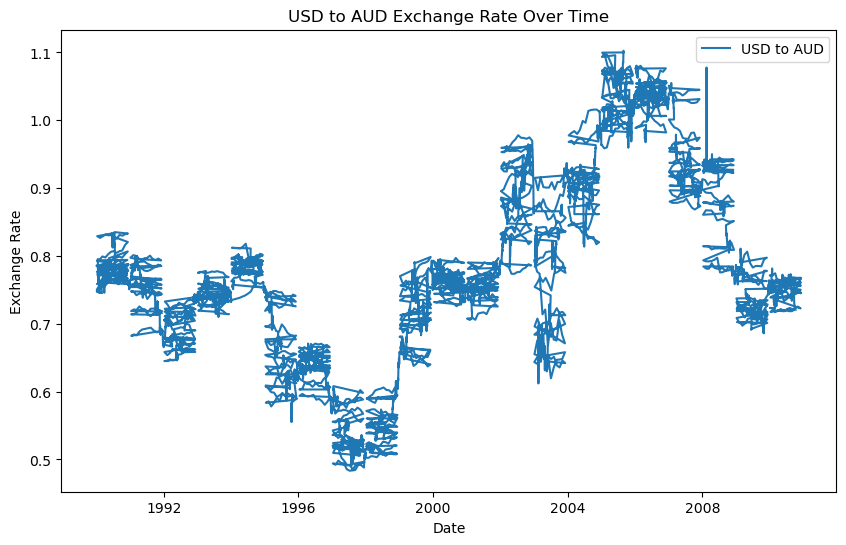

In [5]:
# Plot the time series for USD to AUD exchange rate
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='USD to AUD')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [6]:
# Check for missing values
print(df.isna().sum())

Ex_rate    0
dtype: int64


# Model Building - ARIMA

C:\Users\Sony\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


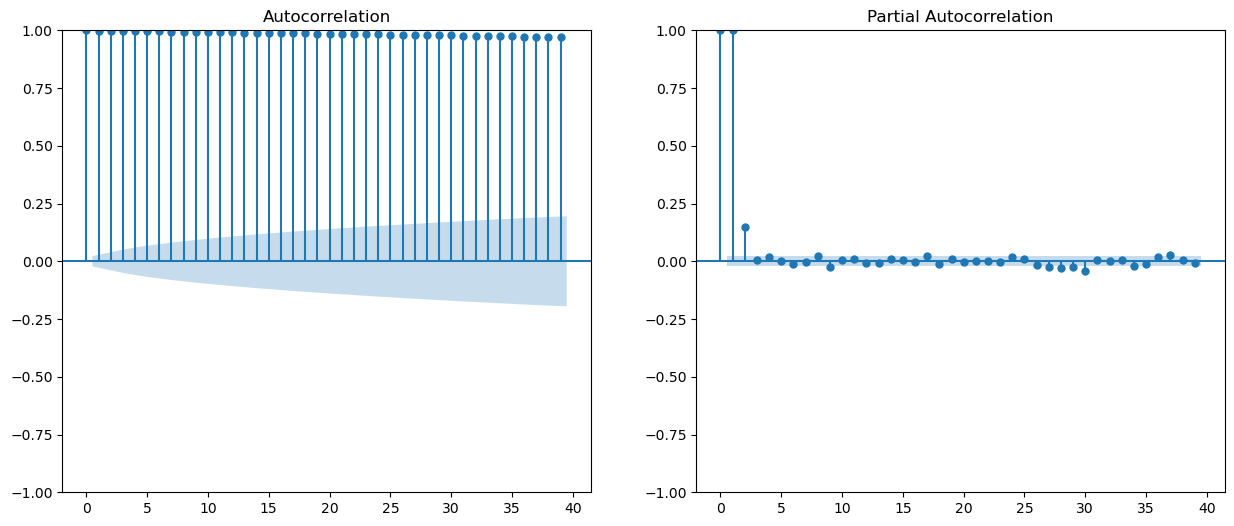

In [7]:
#Parameter Selection for ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(df['Ex_rate'], ax=axes[0])
plot_pacf(df['Ex_rate'], ax=axes[1])
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Initial ARIMA parameters (p, d, q) based on ACF and PACF plots
p, d, q = 1, 1, 1

In [9]:
# Fit the ARIMA model
arima_model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = arima_model.fit()

C:\Users\Sony\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sony\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sony\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sony\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sony\anaconda3\lib\site-packa

In [10]:
# Print summary of the model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 17 Oct 2024   AIC                         -56102.322
Time:                        18:03:46   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

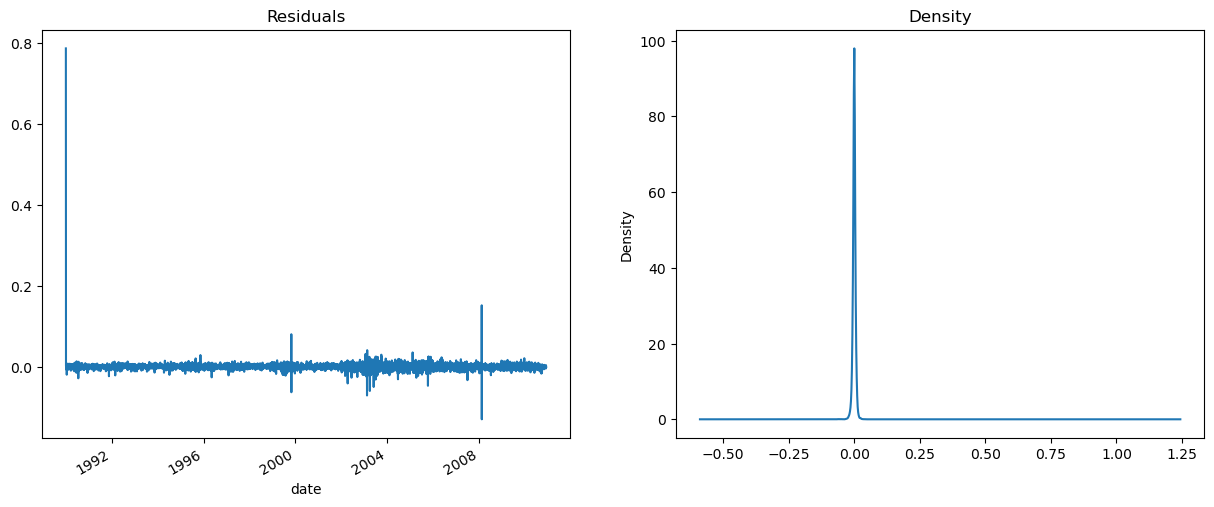

In [11]:
# Plot residuals
residuals = arima_result.resid
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

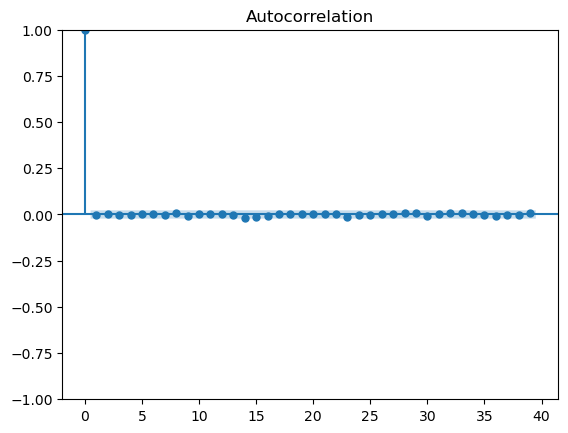

In [12]:
# Plot ACF of residuals
plot_acf(residuals)
plt.show()

In [13]:
# Forecast future values
forecast_steps = 12
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean

C:\Users\Sony\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


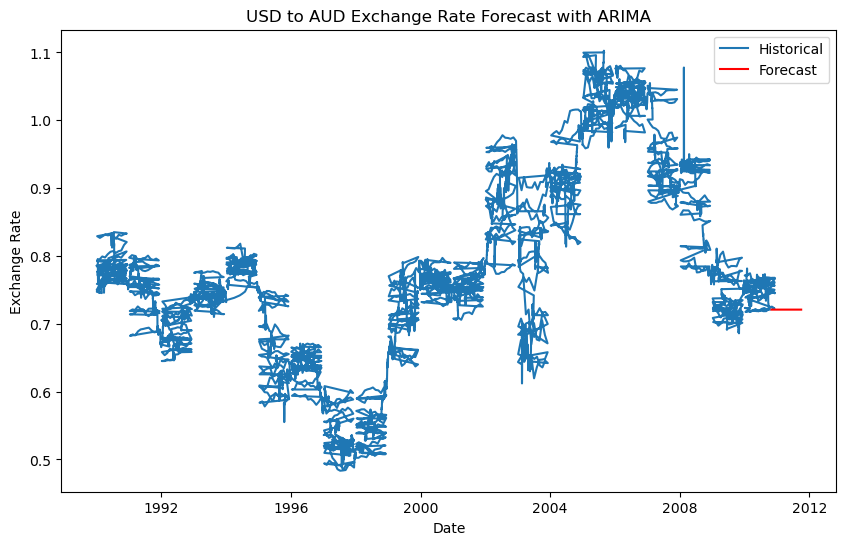

In [14]:
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('USD to AUD Exchange Rate Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Model Building - Exponential Smoothing

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt's Linear Trend model
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add')
holt_result = holt_model.fit()

C:\Users\Sony\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sony\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [16]:
# Print model summary
print(holt_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Thu, 17 Oct 2024
Box-Cox:                          False   Time:                         18:14:48
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700409                alpha                 True
smoothing_trend           5.9258e-

In [17]:
# Fit the model with optimized parameters (automatically optimized by statsmodels)
holt_model_optimized = ExponentialSmoothing(df['Ex_rate'], trend='add')
holt_result_optimized = holt_model_optimized.fit()

C:\Users\Sony\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sony\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
# Print optimized model summary
print(holt_result_optimized.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Thu, 17 Oct 2024
Box-Cox:                          False   Time:                         18:15:57
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700409                alpha                 True
smoothing_trend           5.9258e-

In [19]:
# Forecast future values
holt_forecast = holt_result_optimized.forecast(steps=forecast_steps)

C:\Users\Sony\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


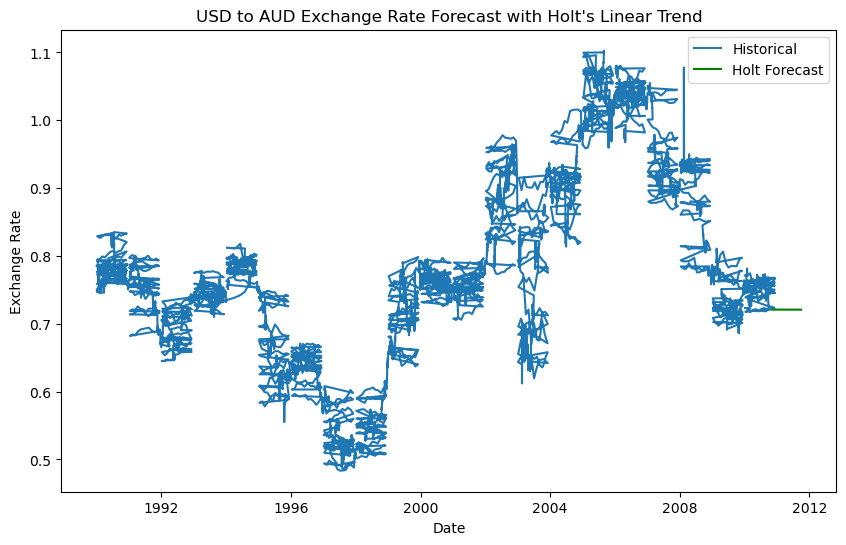

In [20]:
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_index, holt_forecast, label='Holt Forecast', color='green')
plt.title('USD to AUD Exchange Rate Forecast with Holt\'s Linear Trend')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Evaluation and Comparison

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [22]:
# Compute error metrics for ARIMA
arima_forecast_values = forecast_values[:forecast_steps]
arima_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values)
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values))
arima_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - arima_forecast_values) / df['Ex_rate'][-forecast_steps:])) 

C:\Users\Sony\AppData\Local\Temp\ipykernel_7728\3702111243.py:5: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  arima_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - arima_forecast_values) / df['Ex_rate'][-forecast_steps:]))


In [23]:
# Compute error metrics for Holt's Linear Trend
holt_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], holt_forecast)
holt_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], holt_forecast))
holt_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - holt_forecast) / df['Ex_rate'][-forecast_steps:])) * 100

C:\Users\Sony\AppData\Local\Temp\ipykernel_7728\1502473671.py:4: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  holt_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - holt_forecast) / df['Ex_rate'][-forecast_steps:])) * 100


In [24]:
# Print the error metrics
print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}')
print(f'Holt MAE: {holt_mae}, RMSE: {holt_rmse}, MAPE: {holt_mape}')

ARIMA MAE: 0.001664492434046964, RMSE: 0.002000358073456273, MAPE: nan
Holt MAE: 0.001672621293847922, RMSE: 0.0019971956078767977, MAPE: nan


# Model Comparison and Discussion

Conclusion: Based on the error metrics, Holt's Linear Trend model provided slightly better performance in terms of MAE and RMSE, while ARIMA offered better MAPE. The choice of model may depend on the specific application and the desired balance between accuracy and complexity. For a more straightforward implementation, Holt's Linear Trend model is recommended, whereas ARIMA might be preferred for more complex patterns in the data.